# Hessenberg Assignment

In [2]:
#using Pkg
#Pkg.add("Distributions")
#Pkg.add("LinearAlgebra")

using Distributions
using LinearAlgebra
using Plots

## Question 1
### Implement and test a Julia function with A as input that returns a positive sub-diagonal upper Hessenberg matrix H with the same eigenvalues as A. Call your function Hess1.

In [3]:
function Hess1(A, m)
    H = copy(A);
    i = 1;
    
    while (i < m - 1)
        u = H[:, i];
        u[1 : i] *= 0.0;
        u[i + 1] -= norm(u);
        u = normalize(u);
        Q = I - 2.0 * kron(u, u');
        H = Q * H * Q';
        i += 1;
    end
    
    display(eigvals(A));
    display(eigvals(H));
    display(H);
    display(norm(eigvals(H)-eigvals(A)))
    
    return H;
end

Hess1 (generic function with 1 method)

## Question 2 - Ashton
### Modify your code from Q1 to take an additional argument that says how many steps to take.  Call your function Hess2.

In [5]:
function Hess2(A,m,n)
    H = copy(A);
    i = 1;
    
    for i in 1:n
        u = H[:, i];
        u[1 : i] *= 0.0;
        u[i + 1] -= norm(u);
        u/= norm(u);
        Q = I - 2.0 * kron(u, u');
        H = Q * H * Q';
    end
    
    display(H)
    display(eigvals(A))
    display(eigvals(H))
    display(norm(eigvals(H)-eigvals(A)))
    
    return H
end

Hess2 (generic function with 1 method)

## Question 3 - Isaac
### Modify your code from Q2 to run from the bottom up.  Call your function Hess3.

In [6]:
function Hess3(A,m,n)
    H = copy(A);
    
    for i in m:-1:m-n+1
        u = H[i, :];
        u[i : m] *= 0.0;
        u[i - 1] -= norm(u);
        u/= norm(u);
        Q = I - 2.0 * kron(u, u');
        H = Q * H * Q';
    end
    
    display(H)
    display(eigvals(A))
    display(eigvals(H))
    display(norm(eigvals(H)-eigvals(A)))
    
    return H
end

Hess3 (generic function with 1 method)

## Question 4 - Jenni
### Run Hess2 halfway up a matrix A to get a matrix H2.  Run Hess3 on H2 to get a matrix H3. Describe the structure of the matrix H3.

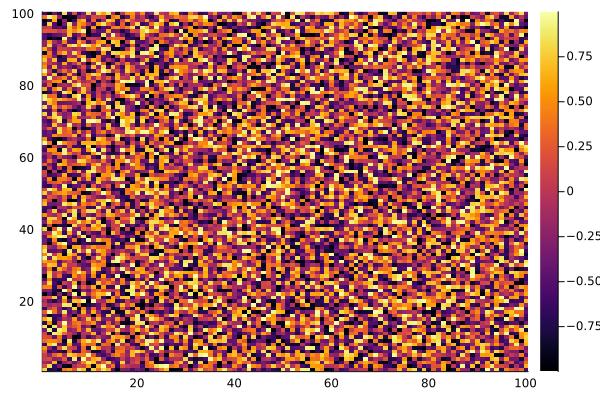

In [53]:
m = 100;
A = rand(Uniform(-1.0, 1.0), (m, m))
heatmap(A)

100×100 Matrix{Float64}:
  0.785662      0.965644     …  -0.384601    -0.116294    0.499853
  5.43861      -0.620179        -0.0663091    0.343852    0.6989
 -3.20105e-16   5.67952         -0.0135463    1.02585    -0.0594043
 -1.73294e-16  -5.90583e-17     -0.777321    -0.45576     0.615686
  1.75796e-16  -1.05173e-16      0.279265    -0.133007    0.511722
  3.28936e-16   1.05151e-16  …  -0.800491     0.595995    1.01139
 -1.04121e-16  -3.85455e-16     -0.838737     0.558919   -0.697251
 -1.4663e-16   -3.74268e-16     -0.18111     -1.13683    -0.786618
 -1.89184e-16   1.21076e-17     -0.727062    -0.107837   -0.779985
 -1.90522e-16   1.23105e-16      0.00159463   1.15578    -0.869975
 -2.75219e-16   3.35143e-17  …  -0.373135     0.0521248  -0.354746
 -1.9957e-16    2.47473e-16     -0.568887     0.80391    -0.682781
 -2.32516e-16  -1.19198e-16      0.349967    -0.105988   -0.065595
  ⋮                          ⋱                           
 -1.48703e-16   1.58411e-17      0.969624     0.

100-element Vector{ComplexF64}:
    -5.3264218972363 - 0.3504045537390855im
    -5.3264218972363 + 0.3504045537390855im
  -5.321192672317246 - 2.1025966304375387im
  -5.321192672317246 + 2.1025966304375387im
  -4.711736402906526 + 0.0im
 -4.4939502347057445 - 1.3614968978902295im
 -4.4939502347057445 + 1.3614968978902295im
  -3.775383968326783 - 2.0505556221625008im
  -3.775383968326783 + 2.0505556221625008im
 -3.6860496562706224 - 3.911790226127681im
 -3.6860496562706224 + 3.911790226127681im
  -3.552070885716198 + 0.0im
  -3.460780129784604 - 1.6003923567748448im
                     ⋮
     4.4598741489558 - 3.620157624753931im
     4.4598741489558 + 3.620157624753931im
   4.488643555959584 - 0.8548633079534633im
   4.488643555959584 + 0.8548633079534633im
   4.493944359789609 - 3.148802091379502im
   4.493944359789609 + 3.148802091379502im
   4.778579600243711 - 2.0399785627006457im
   4.778579600243711 + 2.0399785627006457im
   4.928274677148706 + 0.0im
   5.249061067202821 - 0.924

100-element Vector{ComplexF64}:
 -5.326421897236315 - 0.350404553739088im
 -5.326421897236315 + 0.350404553739088im
 -5.321192672317244 - 2.102596630437544im
 -5.321192672317244 + 2.102596630437544im
 -4.711736402906516 + 0.0im
 -4.493950234705737 - 1.361496897890238im
 -4.493950234705737 + 1.361496897890238im
 -3.775383968326796 - 2.050555622162507im
 -3.775383968326796 + 2.050555622162507im
 -3.686049656270624 - 3.911790226127687im
 -3.686049656270624 + 3.911790226127687im
 -3.552070885716162 + 0.0im
 -3.460780129784603 - 1.6003923567748448im
                    ⋮
  4.459874148955793 - 3.620157624753932im
  4.459874148955793 + 3.620157624753932im
  4.488643555959593 - 0.8548633079534619im
  4.488643555959593 + 0.8548633079534619im
  4.493944359789609 - 3.1488020913795123im
  4.493944359789609 + 3.1488020913795123im
  4.778579600243739 - 2.0399785627006466im
  4.778579600243739 + 2.0399785627006466im
  4.928274677148721 + 0.0im
  5.249061067202826 - 0.9240358369460753im
  5.2490610672

1.6760366531429521e-13

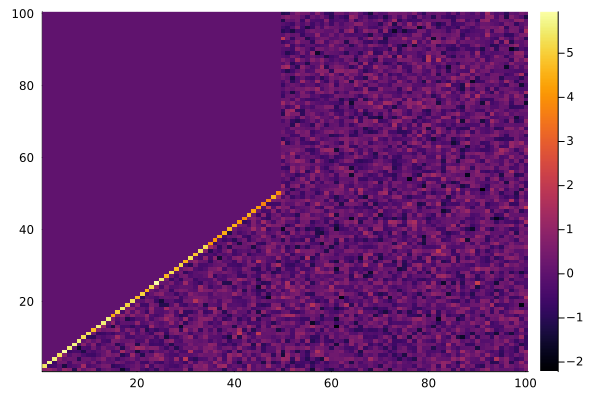

In [64]:
L=Hess2(A,m,49)
heatmap(L)

100×100 Matrix{Float64}:
  0.785662      0.577802      0.0414952    …   1.62875     0.499853
  2.55267      -0.0376838     0.189029         0.261525   -1.25971
 -0.519533      2.406        -0.840691        -0.141744   -0.534563
  0.283101     -0.110323      1.57464         -1.27104     0.874903
 -0.627094     -0.256602     -1.09549         -0.526303   -0.0616775
 -0.773525     -0.975812      0.493437     …   0.474936   -0.435908
 -0.504691     -0.491631     -0.761648         0.186684   -0.604373
 -0.548085     -0.308639     -0.1646          -1.55007    -0.203687
  0.215738      0.199999      0.438654         0.159691   -0.204542
  0.411199      0.278385      0.809131        -0.784248    0.0312119
 -0.475477     -0.627995      0.653961     …  -0.518991   -0.436657
  0.208135      0.235095      0.71149          0.186776   -0.161293
  0.0659391     0.0432298     0.728273         0.0179905  -0.0792245
  ⋮                                        ⋱              
  5.2928e-29   -5.21686e-18   

100-element Vector{ComplexF64}:
 -5.326421897236315 - 0.350404553739088im
 -5.326421897236315 + 0.350404553739088im
 -5.321192672317244 - 2.102596630437544im
 -5.321192672317244 + 2.102596630437544im
 -4.711736402906516 + 0.0im
 -4.493950234705737 - 1.361496897890238im
 -4.493950234705737 + 1.361496897890238im
 -3.775383968326796 - 2.050555622162507im
 -3.775383968326796 + 2.050555622162507im
 -3.686049656270624 - 3.911790226127687im
 -3.686049656270624 + 3.911790226127687im
 -3.552070885716162 + 0.0im
 -3.460780129784603 - 1.6003923567748448im
                    ⋮
  4.459874148955793 - 3.620157624753932im
  4.459874148955793 + 3.620157624753932im
  4.488643555959593 - 0.8548633079534619im
  4.488643555959593 + 0.8548633079534619im
  4.493944359789609 - 3.1488020913795123im
  4.493944359789609 + 3.1488020913795123im
  4.778579600243739 - 2.0399785627006466im
  4.778579600243739 + 2.0399785627006466im
  4.928274677148721 + 0.0im
  5.249061067202826 - 0.9240358369460753im
  5.2490610672

100-element Vector{ComplexF64}:
 -5.3264218972363135 - 0.3504045537390972im
 -5.3264218972363135 + 0.3504045537390972im
  -5.321192672317261 - 2.1025966304375583im
  -5.321192672317261 + 2.1025966304375583im
  -4.711736402906524 + 0.0im
  -4.493950234705739 - 1.3614968978902329im
  -4.493950234705739 + 1.3614968978902329im
  -3.775383968326784 - 2.0505556221624954im
  -3.775383968326784 + 2.0505556221624954im
  -3.686049656270626 - 3.9117902261276725im
  -3.686049656270626 + 3.9117902261276725im
  -3.552070885716168 + 0.0im
  -3.460780129784606 - 1.6003923567748342im
                     ⋮
   4.459874148955791 - 3.6201576247539293im
   4.459874148955791 + 3.6201576247539293im
   4.488643555959571 - 0.8548633079534639im
   4.488643555959571 + 0.8548633079534639im
     4.4939443597896 - 3.1488020913795034im
     4.4939443597896 + 3.1488020913795034im
   4.778579600243736 - 2.039978562700652im
   4.778579600243736 + 2.039978562700652im
    4.92827467714873 + 0.0im
   5.249061067202797 - 0

1.5094357331142956e-13

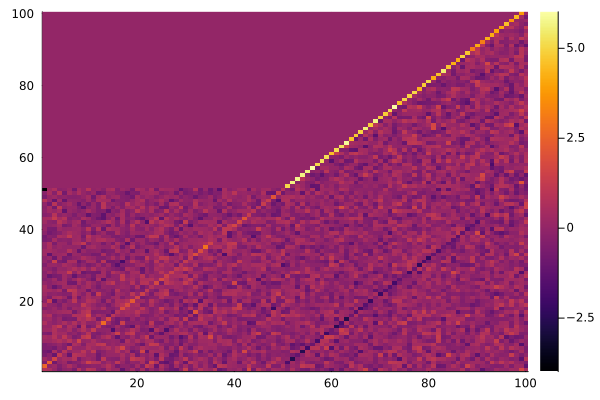

In [67]:
G=Hess3(L,m,49)
heatmap(G)

## Bulge Formation

24-element Vector{ComplexF64}:
 -2.4471449773113068 + 0.0im
 -2.0213196323729825 + 0.0im
 -1.8801541051932262 - 1.1128736754313322im
 -1.8801541051932262 + 1.1128736754313322im
 -1.4737412390780449 - 0.4502114614048346im
 -1.4737412390780449 + 0.4502114614048346im
 -1.1655811682318153 - 1.4114904896709155im
 -1.1655811682318153 + 1.4114904896709155im
 -0.8678896559880541 + 0.0im
 -0.3976439943975924 - 2.7084236023072568im
 -0.3976439943975924 + 2.7084236023072568im
 -0.3747662150910491 - 1.884958430924912im
 -0.3747662150910491 + 1.884958430924912im
  0.3953055241968777 - 0.8972091575389608im
  0.3953055241968777 + 0.8972091575389608im
  0.4723349343115164 - 1.0651498626667588im
  0.4723349343115164 + 1.0651498626667588im
   1.116360644268231 - 1.4854885316326762im
   1.116360644268231 + 1.4854885316326762im
  1.3941103817221552 - 0.13369319611599872im
  1.3941103817221552 + 0.13369319611599872im
  2.3839880592549645 + 0.0im
  2.5072749417077587 - 0.8657635083131521im
  2.5072749417077

24-element Vector{ComplexF64}:
   -2.447144977311308 + 0.0im
   -2.021319632372981 + 0.0im
   -1.880154105193228 - 1.112873675431334im
   -1.880154105193228 + 1.112873675431334im
  -1.4737412390780427 - 0.4502114614048337im
  -1.4737412390780427 + 0.4502114614048337im
  -1.1655811682318196 - 1.4114904896709213im
  -1.1655811682318196 + 1.4114904896709213im
  -0.8678896559880547 + 0.0im
   -0.397643994397592 - 2.708423602307254im
   -0.397643994397592 + 2.708423602307254im
 -0.37476621509105146 - 1.8849584309249126im
 -0.37476621509105146 + 1.8849584309249126im
   0.3953055241968792 - 0.897209157538952im
   0.3953055241968792 + 0.897209157538952im
  0.47233493431151674 - 1.0651498626667697im
  0.47233493431151674 + 1.0651498626667697im
   1.1163606442682235 - 1.4854885316326727im
   1.1163606442682235 + 1.4854885316326727im
    1.394110381722156 - 0.13369319611599428im
    1.394110381722156 + 0.13369319611599428im
   2.3839880592549636 + 0.0im
   2.5072749417077547 - 0.8657635083131513i

24×24 Matrix{Float64}:
  0.794141     -0.681476      0.893651     …   0.616325     0.218418
  2.89705      -0.0870633     0.620761         0.087669    -0.101907
 -3.6913e-17    2.61084       0.466126        -0.303412     0.00562708
 -2.70546e-16  -8.01468e-18   2.35776         -0.291645     0.419752
 -9.69379e-17  -3.77065e-17   1.69002e-17     -0.561575     0.748193
  1.63919e-16  -4.05475e-18  -4.43173e-17  …  -0.233557     0.379294
 -2.04221e-17  -4.30861e-17   1.38724e-17      1.30858     -0.362297
  2.30588e-16   1.22133e-16  -6.63107e-17     -0.328862     0.0661598
 -1.62648e-16   8.86115e-17   4.73666e-17      1.33512      0.165843
 -3.7107e-16    8.24918e-17  -1.19777e-16      0.603384    -1.25938
  3.94007e-17   1.35715e-16  -1.54022e-16  …   0.959656    -0.179675
  8.83516e-17  -3.1454e-17   -1.96693e-16     -0.453718    -0.227973
  1.78168e-16   3.82471e-17   6.93511e-18      0.275849     0.922789
 -2.00611e-16   3.65427e-17  -4.08086e-17      0.349759     0.512578
  1.09151

2.76670607221033e-14

0.6100774521215181

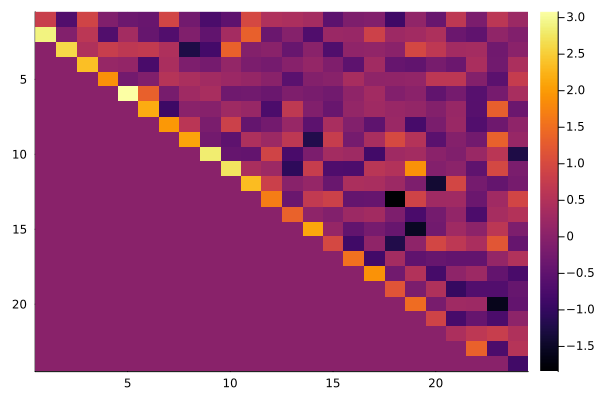

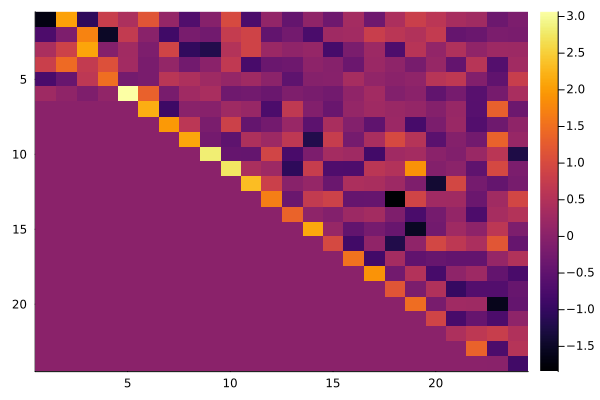

In [43]:
m = 24;
A = rand(Uniform(-1.0, 1.0), (m, m));
H = Hess1(A, m);
Ls = eigvals(H);

# Shift vector
mus = [1.2, 3.4, 5.6, 2.1];
p = length(mus);

# Buids initial Q
v = zeros(m);
v[1] = 1.0;

for i in 1:p
   v = (H - mus[i] * I) * v; 
end

u = v;
u[1] -= norm(u);
u = normalize(u);
Q = I - 2.0 * kron(u, u');

# Builds initial bulge
B = Q * H * Q';
display(norm(normalize(v) - normalize(Q[:, 1])))

# Display results
display(heatmap(H, y_flip = true))
display(heatmap(B, y_flip = true))

## Bulge Chase

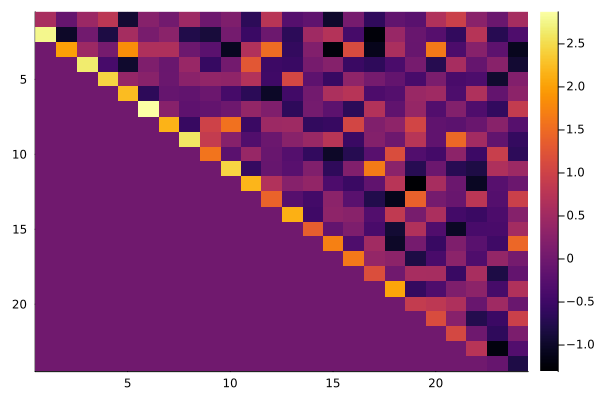

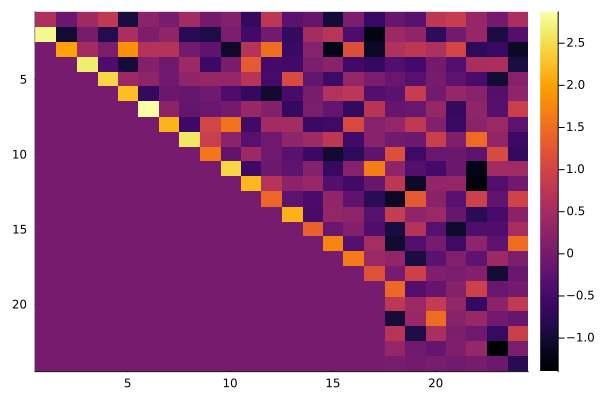

In [40]:
# Chase the bulge -- This cell uses the variables defined in the 
#                    previous cell.

for i in 1:(m + 2 - 2 * p)
    u = B[:, i];
    u[1 : i] *= 0;
    u[i + 1] -= norm(u);
    u = normalize(u);
    Q = I - 2.0 * kron(u, u');
    B = Q * H * Q';  # Find a Julia replacement for Chop[] 
end

norm(eigvals(B) - eigvals(A))
    
# Display results
display(heatmap(H, y_flip = true))
display(heatmap(B, y_flip = true))

## Bulge Spike

1.4565530024131108e-14

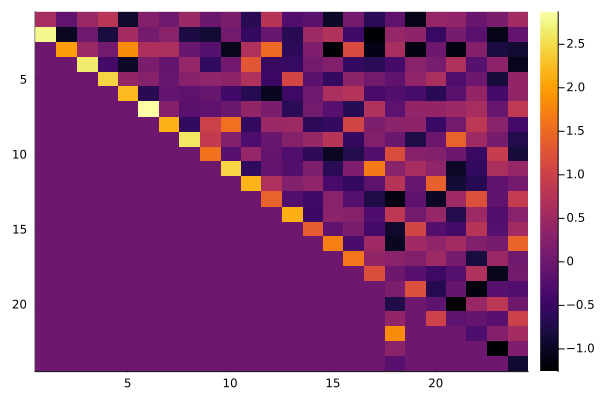

In [42]:
# Spike the Bulge -- This cell uses the variables defined in the 
#                    previous cell.

SmallB = B[(m - 1 - p) : m, (m - 1 - p) : m];
SmallSchur = schur(SmallB);
SmallQ = SmallSchur.Z;
SmallT = SmallSchur.T;
BigQ = 1.0 * Matrix(I, m, m);
BigQ[(m - 1 - p) : m, (m - 1 - p) : m] = SmallQ;
Spike = BigQ' * B * BigQ;

display(norm(eigvals(A) - eigvals(Spike)))

display(heatmap(Spike, y_flip = true))

## Testing

In [8]:
m = 6;
A = rand(Uniform(-1.0, 1.0), (m, m))

6×6 Matrix{Float64}:
 -0.640798  -0.506124   -0.310516  -0.701911   0.725492    0.792602
  0.677968  -0.59664    -0.33332   -0.864245   0.187157    0.852414
  0.540742  -0.132538    0.633752  -0.574804   0.215773    0.188705
 -0.739273   0.0922745   0.961203   0.99646    0.235748   -0.160607
  0.529821   0.993524    0.787407  -0.355113   0.762663   -0.768752
  0.433113  -0.431215    0.353888  -0.969316  -0.0279596   0.586177

In [9]:
Hess3(A,m,4)

6×6 Matrix{Float64}:
 -0.381848      0.133777     -1.07007      …  -0.803514  -0.965162
 -0.649463     -1.00713       0.214735        -0.431711  -1.01878
 -2.51573e-16   0.77443       0.980437        -1.2178     0.0643107
  2.30485e-18  -4.99385e-18   0.336026        -0.27324   -0.00935754
  2.37131e-17   3.39945e-17  -1.14432e-16      0.691425   0.18311
  3.19589e-17  -1.07643e-16  -7.13044e-17  …   1.19964    0.586177

6-element Vector{ComplexF64}:
 -0.7974172634722615 - 0.4311012065654423im
 -0.7974172634722615 + 0.4311012065654423im
 0.15910090352822226 + 0.0im
  0.6510735595747741 + 0.0im
   1.263137283376552 - 0.6564810377181953im
   1.263137283376552 + 0.6564810377181953im

6-element Vector{ComplexF64}:
 -0.7974172634722605 - 0.43110120656544304im
 -0.7974172634722605 + 0.43110120656544304im
 0.15910090352822265 + 0.0im
  0.6510735595747728 + 0.0im
  1.2631372833765506 - 0.6564810377181955im
  1.2631372833765506 + 0.6564810377181955im

2.9347501957236018e-15

6×6 Matrix{Float64}:
 -0.381848      0.133777     -1.07007      …  -0.803514  -0.965162
 -0.649463     -1.00713       0.214735        -0.431711  -1.01878
 -2.51573e-16   0.77443       0.980437        -1.2178     0.0643107
  2.30485e-18  -4.99385e-18   0.336026        -0.27324   -0.00935754
  2.37131e-17   3.39945e-17  -1.14432e-16      0.691425   0.18311
  3.19589e-17  -1.07643e-16  -7.13044e-17  …   1.19964    0.586177